In [2]:
# os: Operating System의 줄임말로, 운영체제에서 제공되는 여러 기능을 파이썬에서 사용할 수 있도록 함 (Ex. 디렉토리 경로 이동, 시스템 환경 변수 가져오기 등)
# urllib: URL 작업을 위한 여러 모듈을 모은 패키지. (Ex. urllib.request, urllib.parse, ...)
# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
# pixellib: 이미지 및 비디오 segmentation을 수행하기 위한 라이브러리. 
# pixellib.semantic: segmentation 기법 중, semantic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리
# matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('슝=3')

슝=3


(500, 892, 3)


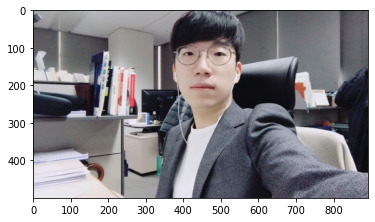

In [3]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7a6e9d9ad820>)

In [5]:
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

segvalues, output = model.segmentAsPascalvoc(img_path) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

In [6]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

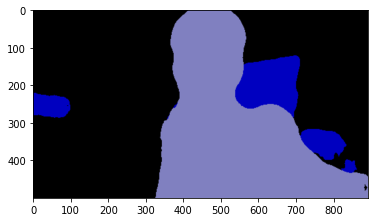

In [7]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [8]:
segvalues # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력

#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person


In [9]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [10]:
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

In [11]:
seg_color = (128,128,192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

(500, 892)


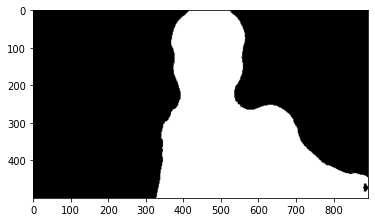

In [12]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

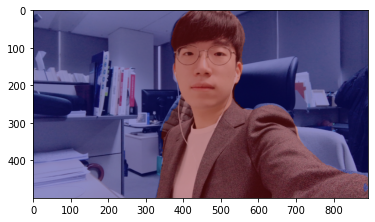

In [13]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

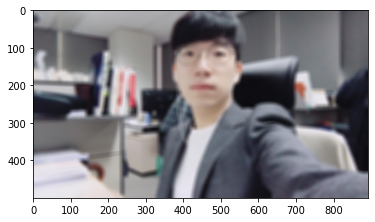

In [14]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

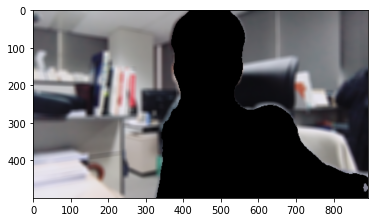

In [15]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

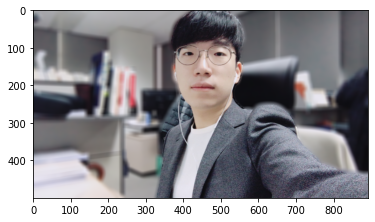

In [16]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

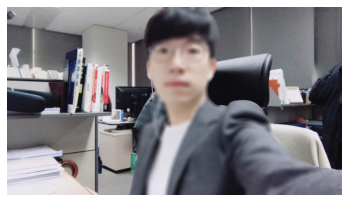

In [17]:
# 사람 부분만 흐리게, 배경 부분은 원본 유지
img_concat = np.where(img_mask_color == 255, img_orig_blur, img_orig)

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

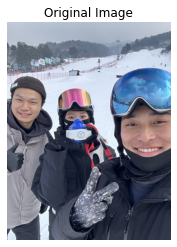

In [30]:
import os
import cv2
import matplotlib.pyplot as plt

# 이미지 경로 설정
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/IMG_9537.png'

# 이미지 읽기
img_orig = cv2.imread(img_path)

# 이미지 출력하여 제대로 불러왔는지 확인
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
plt.show()

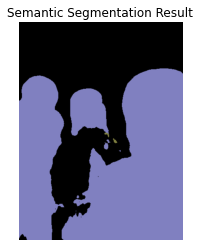

In [24]:
from pixellib.semantic import semantic_segmentation

# 모델 경로 설정
model_file = os.path.join(os.getenv('HOME'), 'aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# 세그멘테이션 모델 로드 (PascalVOC 기반)
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

# 이미지에 세그멘테이션 적용
segvalues, output = model.segmentAsPascalvoc(img_path)

# 세그멘테이션 결과 출력
plt.imshow(output)
plt.axis('off')
plt.title('Semantic Segmentation Result')
plt.show()

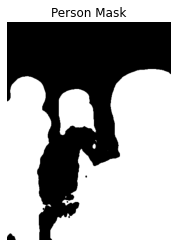

In [25]:
import numpy as np

# 사람을 나타내는 색상 (PascalVOC 기준)
seg_color = (128, 128, 192)

# output 이미지에서 사람이 있는 픽셀만 True로 설정한 마스크 생성
seg_map = np.all(output == seg_color, axis=-1)

# 마스크 시각화 확인
plt.imshow(seg_map, cmap='gray')
plt.axis('off')
plt.title('Person Mask')
plt.show()

# 마스크 컬러 이미지로 변환 (다음 단계 사용을 위해 미리 변환)
img_mask = seg_map.astype(np.uint8) * 255
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

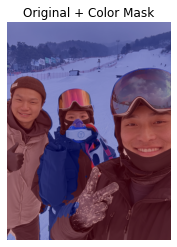

In [26]:
# 원본 이미지 복사
img_show = img_orig.copy()

# seg_map(True/False)를 흑백 마스크(255/0)로 변환
img_mask = seg_map.astype(np.uint8) * 255

# 흑백 마스크를 컬러 마스크로 변환
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 컬러 마스크를 합성
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

# 결과 확인
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original + Color Mask')
plt.show()

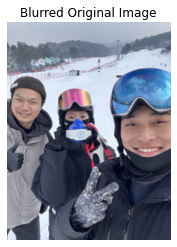

In [27]:
# 블러 처리 (커널 사이즈 조정 가능)
img_orig_blur = cv2.blur(img_orig, (13,13))

# 결과 확인
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Blurred Original Image')
plt.show()

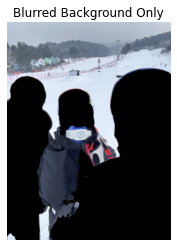

In [28]:
# 흑백 마스크를 컬러 이미지로 변환
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# 마스크를 반전 (사람 영역: 255 → 0, 배경 영역: 0 → 255)
img_bg_mask = cv2.bitwise_not(img_mask_color)

# 블러 처리한 이미지에서 배경만 남기기
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

# 결과 확인
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Blurred Background Only')
plt.show()

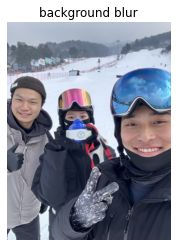

In [34]:
# 사람만 선명 + 배경은 흐리게
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('background blur')
plt.show()

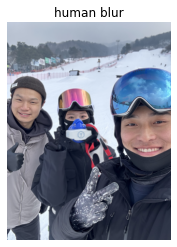

In [35]:
# 사람 영역은 흐림, 배경은 원본 그대로 유지
img_concat_reverse = np.where(img_mask_color==255, img_orig_blur, img_orig)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('human blur')
plt.show()

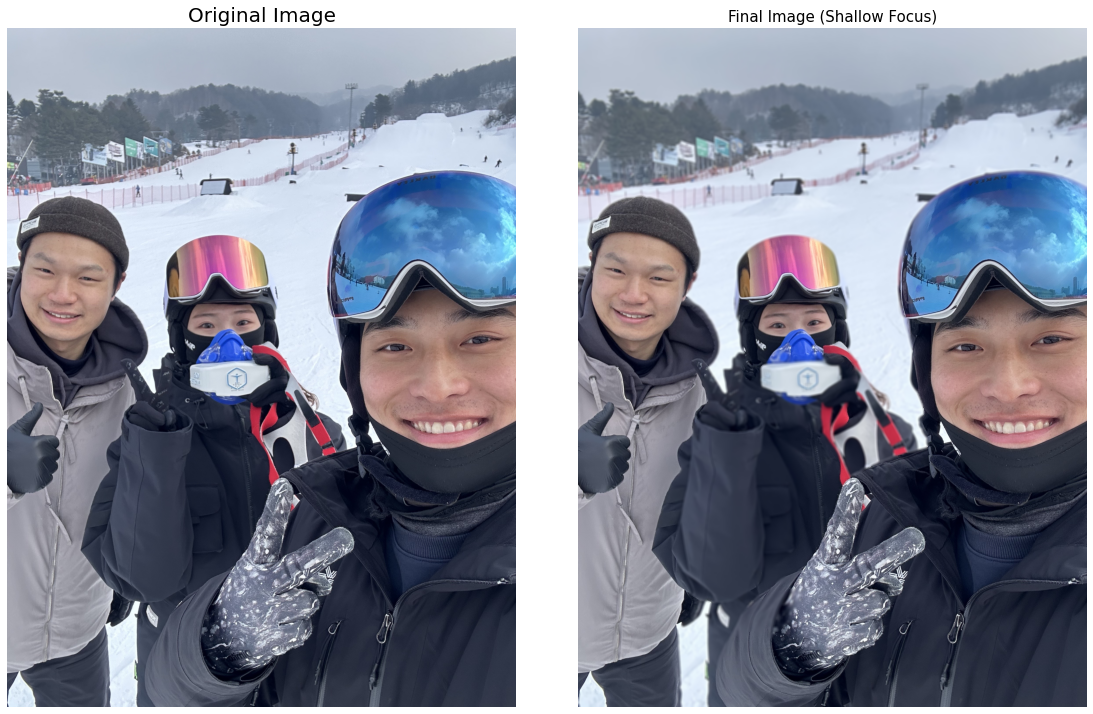

In [33]:
# 비교 이미지 출력 (원본 vs 최종 이미지)
plt.figure(figsize=(16,10))

# 원본 이미지
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.title('Original Image', fontsize=20)
plt.axis('off')

# 최종 합성 이미지 출력 (배경 흐림, 사람 선명)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.title('Final Image (Shallow Focus)', fontsize=15)
plt.axis('off')

plt.tight_layout()
plt.show()

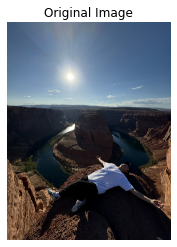

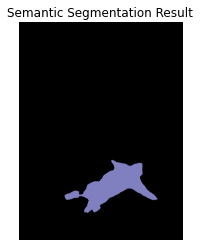

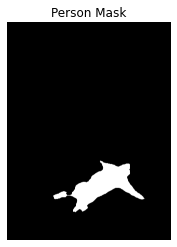

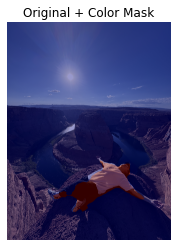

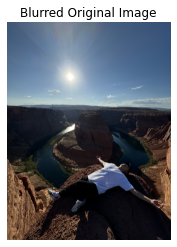

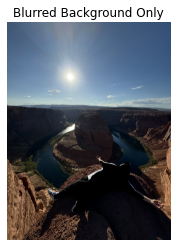

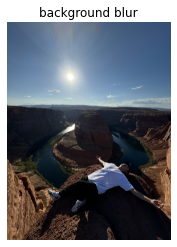

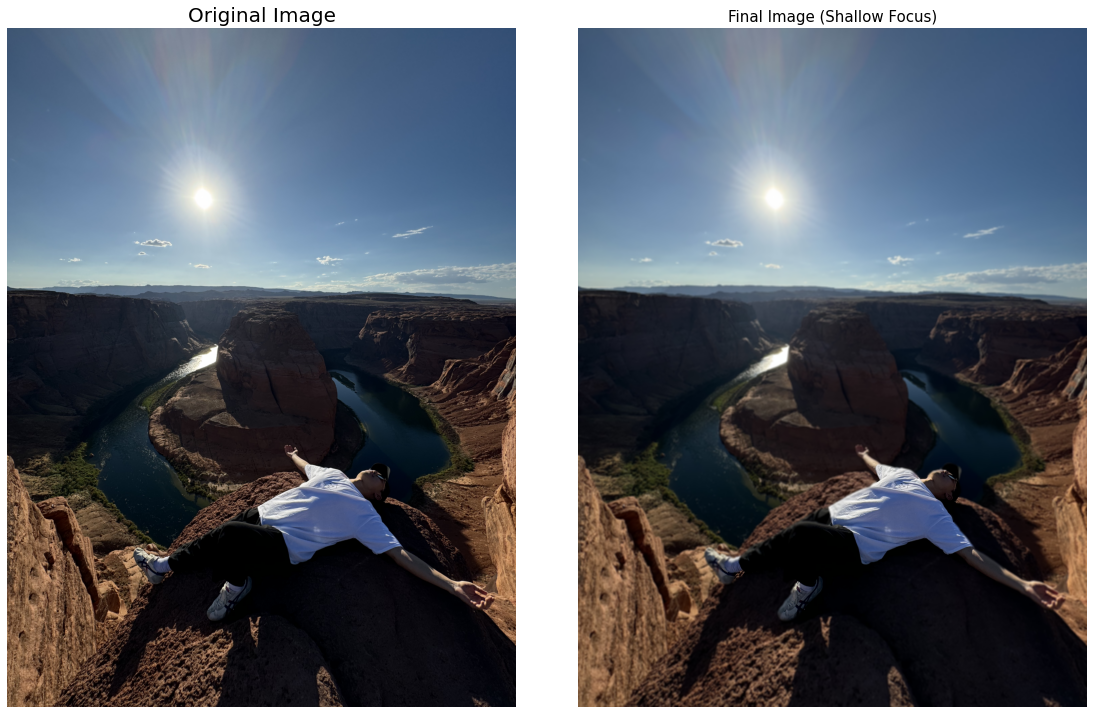

In [37]:
import os
import cv2
import matplotlib.pyplot as plt

# 이미지 경로 설정
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/IMG_3314.png'

# 이미지 읽기
img_orig = cv2.imread(img_path)

# 이미지 출력하여 제대로 불러왔는지 확인
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
plt.show()

from pixellib.semantic import semantic_segmentation

# 모델 경로 설정
model_file = os.path.join(os.getenv('HOME'), 'aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# 세그멘테이션 모델 로드 (PascalVOC 기반)
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

# 이미지에 세그멘테이션 적용
segvalues, output = model.segmentAsPascalvoc(img_path)

# 세그멘테이션 결과 출력
plt.imshow(output)
plt.axis('off')
plt.title('Semantic Segmentation Result')
plt.show()

import numpy as np

# 사람을 나타내는 색상 (PascalVOC 기준)
seg_color = (128, 128, 192)

# output 이미지에서 사람이 있는 픽셀만 True로 설정한 마스크 생성
seg_map = np.all(output == seg_color, axis=-1)

# 마스크 시각화 확인
plt.imshow(seg_map, cmap='gray')
plt.axis('off')
plt.title('Person Mask')
plt.show()

# 마스크 컬러 이미지로 변환 (다음 단계 사용을 위해 미리 변환)
img_mask = seg_map.astype(np.uint8) * 255
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# 원본 이미지 복사
img_show = img_orig.copy()

# seg_map(True/False)를 흑백 마스크(255/0)로 변환
img_mask = seg_map.astype(np.uint8) * 255

# 흑백 마스크를 컬러 마스크로 변환
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 컬러 마스크를 합성
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

# 결과 확인
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original + Color Mask')
plt.show()

# 블러 처리 (커널 사이즈 조정 가능)
img_orig_blur = cv2.blur(img_orig, (13,13))

# 결과 확인
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Blurred Original Image')
plt.show()

# 흑백 마스크를 컬러 이미지로 변환
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# 마스크를 반전 (사람 영역: 255 → 0, 배경 영역: 0 → 255)
img_bg_mask = cv2.bitwise_not(img_mask_color)

# 블러 처리한 이미지에서 배경만 남기기
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

# 결과 확인
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Blurred Background Only')
plt.show()

# 사람만 선명 + 배경은 흐리게
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('background blur')
plt.show()

# 비교 이미지 출력 (원본 vs 최종 이미지)
plt.figure(figsize=(16,10))

# 원본 이미지
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.title('Original Image', fontsize=20)
plt.axis('off')

# 최종 합성 이미지 출력 (배경 흐림, 사람 선명)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.title('Final Image (Shallow Focus)', fontsize=15)
plt.axis('off')

plt.tight_layout()
plt.show()

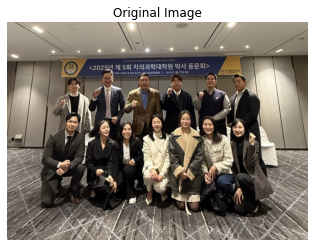

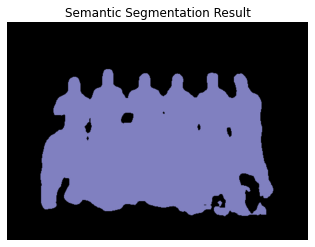

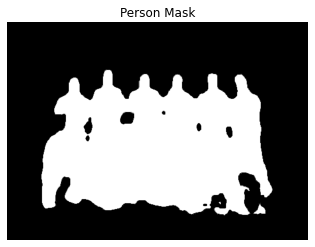

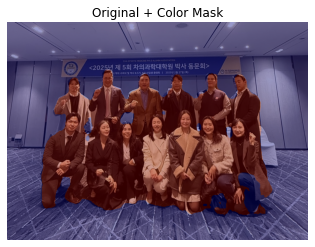

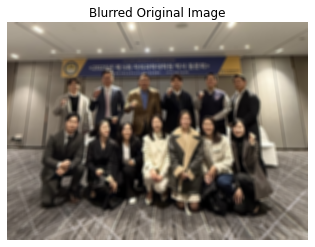

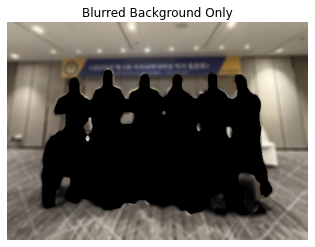

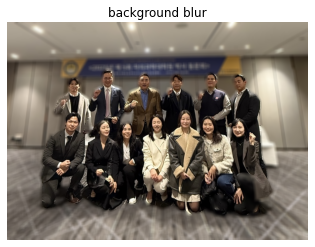

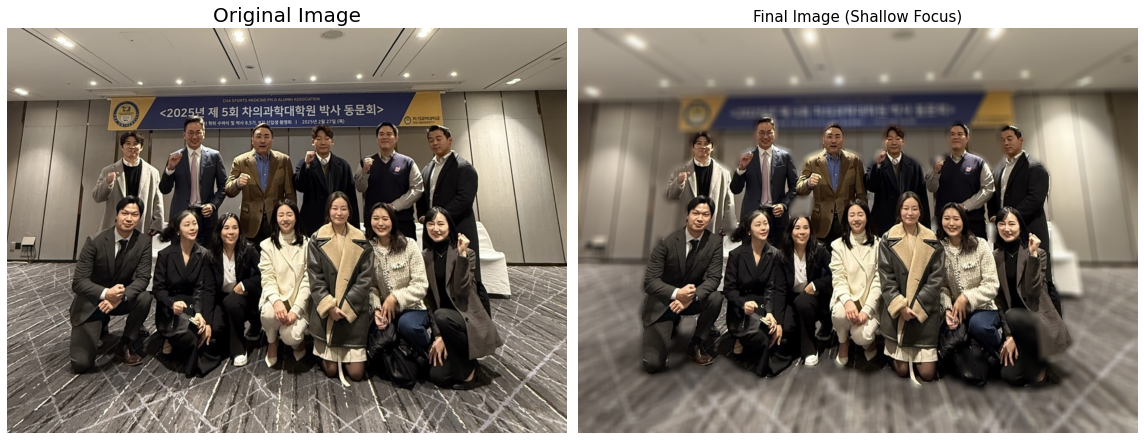

In [38]:
import os
import cv2
import matplotlib.pyplot as plt

# 이미지 경로 설정
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/IMG_9811.png'

# 이미지 읽기
img_orig = cv2.imread(img_path)

# 이미지 출력하여 제대로 불러왔는지 확인
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
plt.show()

from pixellib.semantic import semantic_segmentation

# 모델 경로 설정
model_file = os.path.join(os.getenv('HOME'), 'aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# 세그멘테이션 모델 로드 (PascalVOC 기반)
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

# 이미지에 세그멘테이션 적용
segvalues, output = model.segmentAsPascalvoc(img_path)

# 세그멘테이션 결과 출력
plt.imshow(output)
plt.axis('off')
plt.title('Semantic Segmentation Result')
plt.show()

import numpy as np

# 사람을 나타내는 색상 (PascalVOC 기준)
seg_color = (128, 128, 192)

# output 이미지에서 사람이 있는 픽셀만 True로 설정한 마스크 생성
seg_map = np.all(output == seg_color, axis=-1)

# 마스크 시각화 확인
plt.imshow(seg_map, cmap='gray')
plt.axis('off')
plt.title('Person Mask')
plt.show()

# 마스크 컬러 이미지로 변환 (다음 단계 사용을 위해 미리 변환)
img_mask = seg_map.astype(np.uint8) * 255
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# 원본 이미지 복사
img_show = img_orig.copy()

# seg_map(True/False)를 흑백 마스크(255/0)로 변환
img_mask = seg_map.astype(np.uint8) * 255

# 흑백 마스크를 컬러 마스크로 변환
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 컬러 마스크를 합성
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

# 결과 확인
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original + Color Mask')
plt.show()

# 블러 처리 (커널 사이즈 조정 가능)
img_orig_blur = cv2.blur(img_orig, (13,13))

# 결과 확인
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Blurred Original Image')
plt.show()

# 흑백 마스크를 컬러 이미지로 변환
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# 마스크를 반전 (사람 영역: 255 → 0, 배경 영역: 0 → 255)
img_bg_mask = cv2.bitwise_not(img_mask_color)

# 블러 처리한 이미지에서 배경만 남기기
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

# 결과 확인
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Blurred Background Only')
plt.show()

# 사람만 선명 + 배경은 흐리게
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('background blur')
plt.show()

# 비교 이미지 출력 (원본 vs 최종 이미지)
plt.figure(figsize=(16,10))

# 원본 이미지
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.title('Original Image', fontsize=20)
plt.axis('off')

# 최종 합성 이미지 출력 (배경 흐림, 사람 선명)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.title('Final Image (Shallow Focus)', fontsize=15)
plt.axis('off')

plt.tight_layout()
plt.show()

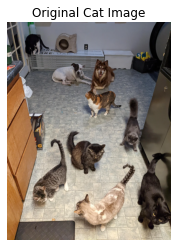

In [39]:
# 이미지 경로 설정
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/catsanddogs.png'
img_orig = cv2.imread(img_path)

# 이미지 출력하여 확인하기
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Cat Image')
plt.show()

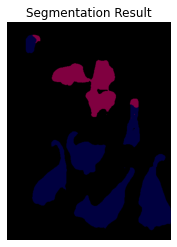

In [49]:
from pixellib.semantic import semantic_segmentation

# 모델 파일 경로 설정 (이미 다운로드되어 있음)
model_file = os.path.join(os.getenv('HOME'), 'aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib 세그멘테이션 모델 로드 (PascalVOC)
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

# 고양이 이미지에 Semantic Segmentation 적용
segvalues, output = model.segmentAsPascalvoc(img_path)

# 결과 이미지 확인
plt.imshow(output)
plt.axis('off')
plt.title('Segmentation Result')
plt.show()

In [50]:
import numpy as np

# 세그멘테이션 결과에서 존재하는 색상값 출력
unique_colors = np.unique(output.reshape(-1, output.shape[2]), axis=0)
print("Detected Colors in Segmentation Output:", unique_colors)

Detected Colors in Segmentation Output: [[  0   0   0]
 [  0   0   1]
 [  0   0   2]
 ...
 [149   0  71]
 [150   0  75]
 [152   0  72]]


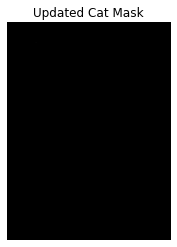

In [59]:
# 고양이에 해당할 가능성이 높은 색상값 적용
cat_color = (149, 0, 71)  # 감지된 색상값 중 하나

# 새로운 마스크 생성
cat_mask = np.all(output == cat_color, axis=-1)

# 마스크 확인
plt.imshow(cat_mask, cmap='gray')
plt.axis('off')
plt.title('Updated Cat Mask')
plt.show()

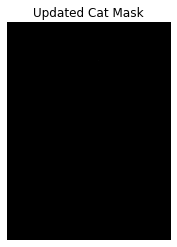

In [52]:
# 새로운 색상값 적용 (unique_colors에서 고양이일 가능성이 높은 색 선택)
cat_color = (150, 0, 75)  # 예시 (출력된 색상값 중에서 선택)

# 새로운 마스크 생성
cat_mask = np.all(output == cat_color, axis=-1)

# 마스크 확인
plt.imshow(cat_mask, cmap='gray')
plt.axis('off')
plt.title('Updated Cat Mask')
plt.show()

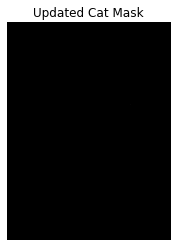

In [53]:
# 새로운 색상값 적용 (unique_colors에서 고양이일 가능성이 높은 색 선택)
cat_color = (152, 0, 72)  # 예시 (출력된 색상값 중에서 선택)

# 새로운 마스크 생성
cat_mask = np.all(output == cat_color, axis=-1)

# 마스크 확인
plt.imshow(cat_mask, cmap='gray')
plt.axis('off')
plt.title('Updated Cat Mask')
plt.show()

In [55]:
# 세그멘테이션을 적용한 객체 목록 확인
print("Extracted Object Class IDs:", segvalues["class_ids"])

Extracted Object Class IDs: [ 0  8 12]


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1741763808.704696     147 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


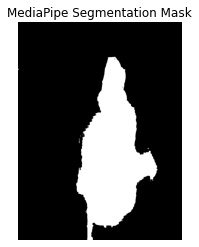

In [61]:
import mediapipe as mp
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mediapipe 모델 로드
mp_selfie_segmentation = mp.solutions.selfie_segmentation

# 이미지 로드 (고양이 이미지)
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/catsanddogs.png'
img_orig = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)

# Mediapipe로 세그멘테이션 수행
with mp_selfie_segmentation.SelfieSegmentation(model_selection=1) as selfie_segmentation:
    results = selfie_segmentation.process(img_rgb)
    mask = results.segmentation_mask > 0.5  # 마스크 임계값 설정

# 마스크 시각화
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.title('MediaPipe Segmentation Mask')
plt.show()

In [62]:
import os
import urllib.request

# 모델 저장 경로
model_dir = os.path.join(os.getenv('HOME'), 'aiffel/human_segmentation/models')
os.makedirs(model_dir, exist_ok=True)

model_file = os.path.join(model_dir, 'deeplabv3_xception65_coco.h5')

# 모델 다운로드 (이미 존재하면 생략)
if not os.path.exists(model_file):
    print("📥 COCO 데이터셋 기반 DeepLabV3 모델 다운로드 중...")
    model_url = "https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.2/deeplabv3_xception65_coco.h5"
    urllib.request.urlretrieve(model_url, model_file)
    print("✅ 다운로드 완료!")
else:
    print("✅ 모델 파일이 이미 존재합니다!")

📥 COCO 데이터셋 기반 DeepLabV3 모델 다운로드 중...


HTTPError: HTTP Error 404: Not Found

In [66]:
import torch
import torchvision
import transformers
import cv2
import matplotlib.pyplot as plt

print("✅ 모든 패키지가 정상적으로 설치되었습니다!")

ImportError: libtinfo.so.5: cannot open shared object file: No such file or directory